In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#Code for graphs to display in notebook

%matplotlib inline

In [3]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited'

In [4]:
#Import Data
df=pd.read_csv(os.path.join(path, 'Open_Space_Municipal_with_Total_Acres.csv'), index_col=False)

#I will be using the municipal dataset which has more data points for this exercise

In [5]:
df.shape

(554, 3)

In [6]:
df.head()

,Municipality,Total_Acres_Open_Space,Total_Acres_In_Municipality
0,1,390.772836,3499.52
1,2,941.670537,6886.40
2,3,3116.170626,4174.08
3,4,309.927139,4846.72
4,5,2779.443567,26291.20


#Caegorical variables were removed for this practice. The municipalities were sorted by county then by municipality in excel. Then the identifying municipality was replaced with a numeric value 

### Elbow Technique

#Use the elbow technique to determine the number of clusters for the dataset

In [7]:
#Set the range for the clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
#Apply the k-means algorithm
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

C:\Users\Zinnia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [9]:
score

[-104006919327.81743,
 -42923114381.12553,
 -25832731175.741272,
 -16817740174.435232,
 -10769627574.051996,
 -8280444815.121174,
 -6884310001.324768,
 -5923375283.634103,
 -5071144374.333762]

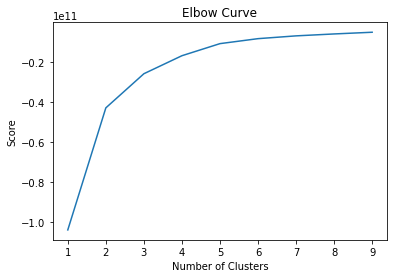

In [10]:
# Plot the elbow curve!

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#My cluster isn't at as sharp of an angle as the example. The sharp bend is at 3 but it flattens starting at 4-5. I will try 3 clusters since that seems closest to the "elbow" of the graph.

### K-Means Clustering

In [11]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [12]:
# Fit the k-means object to the data

kmeans.fit(df)

C:\Users\Zinnia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [13]:
#Create a new 'clusters'column

df['clusters'] = kmeans.fit_predict(df)

C:\Users\Zinnia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [14]:
df.head()

,Municipality,Total_Acres_Open_Space,Total_Acres_In_Municipality,clusters
0,1,390.772836,3499.52,0
1,2,941.670537,6886.40,0
2,3,3116.170626,4174.08,0
3,4,309.927139,4846.72,0
4,5,2779.443567,26291.20,1


In [15]:
#Count values in each cluster
df['clusters'].value_counts()

0    397
1    123
2     34
Name: clusters, dtype: int64

In [16]:
df.columns

Index(['Municipality', 'Total_Acres_Open_Space', 'Total_Acres_In_Municipality',
       'clusters'],
      dtype='object')

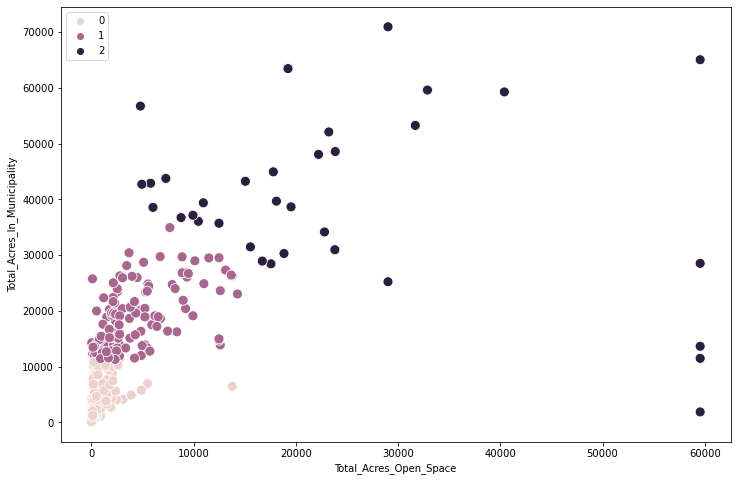

In [17]:
#Visualize the clusters in a scatterplot

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total_Acres_Open_Space'], y=df['Total_Acres_In_Municipality'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Total_Acres_Open_Space')
plt.ylabel('Total_Acres_In_Municipality')
plt.show()

#The clusters make sense since it grouped the data by number of acres. The smallest number of acres are in pale pink, the largest amounts of acreage in both open space and total acres are in dark purple, and the values in between were clustered into a third pink-purple color. I find the dark purple clusters the most interesting because it grouped both points with lots of open space and points with lots of acreage but only a moderate amount of preserved open space together.

#This version of the dataset is simplified as each exercise forces me to tailor the data to the lesson and now I don't have other variables in this dataset to compare. 

In [18]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [19]:
df.groupby('cluster').agg({'Total_Acres_Open_Space':['mean', 'median'], 
                         'Total_Acres_In_Municipality':['mean', 'median']})

Total_Acres_Open_Space               Total_Acres_In_Municipality  \
                              mean        median                        mean   
cluster                                                                        
dark purple           24012.497983  19034.017745                40060.705882   
pink                    395.976858    135.322249                 2639.192343   
purple                 4362.716518   2762.345834                18693.036748   

                       
               median  
cluster                
dark purple  39032.64  
pink          1668.48  
purple       17521.92

#This confirms what I saw in the clusters with the values increasing as the color darkens from pink to pink-purple to dark purple.
The total amount of acres in a municpality isn't going to change as the entire state is incorporated. However, the amount of open space can expand or shrink depending on policies and local government. This could be useful for educating others about open space and encouraging them to consider the impact of their community on the state as a whole since everyone is connected. Visualizations are very powerful as a final deliverable. 
It would be also be interesting to run this analysis with other variables to see if there are any insights that couldn't be seen in the typical scatterplot. That would've been nice to have done this lesson right after the earlier lesson in which we made scatterplots!